<a href="https://colab.research.google.com/github/vyyam-pd/vehicle_emission_model_1/blob/main/Predict_Vehicle_Emissions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
#import
import numpy as np
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from numpy import cov
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from sklearn.model_selection import train_test_split
#import data
drive.mount('/content/drive')
Emission_Data = ('/content/drive/My Drive/CanadaCarEmissions.csv')
df = pd.read_csv(Emission_Data)
#clean data
#abbreviations

# 4WD/4X4 = Four-wheel drive
# AWD = All-wheel drive
# FFV = Flexible-fuel vehicle
# SWB = Short wheelbase
# LWB = Long wheelbase
# EWB = Extended wheelbase

# Transmission

# A = Automatic
# AM = Automated manual
# AS = Automatic with select shift
# AV = Continuously variable
# M = Manual
# 3 - 10 = Number of gears

# Fuel type

# X = Regular gasoline
# Z = Premium gasoline
# D = Diesel
# E = Ethanol (E85)
# N = Natural gas

#liters per 100 kilometers (L/100 km)

#fill na with 0
df= df.fillna(0)
#convert diesel to one hot encoding
df = pd.get_dummies(df, dtype=int)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,MODEL YEAR,ENGINE SIZE (L),CYLINDERS,FUEL CONSUMPTION CITY (L/100),FUEL CONSUMPTION HWY (L/100),COMB (L/100 km),COMB (mpg),CO2 EMISSIONS (g/km),CO2 Rating,Smog Rating,...,TRANSMISSION_M4,TRANSMISSION_M5,TRANSMISSION_M6,TRANSMISSION_M7,FUEL TYPE_0,FUEL TYPE_D,FUEL TYPE_E,FUEL TYPE_N,FUEL TYPE_X,FUEL TYPE_Z
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
1,1995.0,1.8,4.0,11.6,8.3,10.1,28.0,232.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
2,1995.0,1.8,4.0,11.0,8.3,9.8,29.0,225.0,0.0,0.0,...,0,1,0,0,0,0,0,0,1,0
3,1995.0,1.8,4.0,10.8,8.3,9.7,29.0,223.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1
4,1995.0,3.2,6.0,14.2,10.5,12.5,23.0,288.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [9]:
# def pearsonr_coefficient(x):
#   y =  df['CO2 EMISSIONS (g/km)']
#   covariance = cov(x, y)
#   #print(x.name)
#   #pearson's coefficient
#   pearson_corr = pearsonr(x, y)
#   print(x.name, pearson_corr, " ")
#   if(abs(pearson_corr.statistic) < .5 or np.isnan(pearson_corr.statistic)):
#     return x.name
#   return ""

In [10]:
# def spearmans_coefficient(x):
#   y =  df['CO2 EMISSIONS (g/km)']
#   covariance = cov(x, y)
#   #print(x.name)
#   #pearson's coefficient
#   spearman_corr = spearmanr(x, y)
#   print(x.name, spearman_corr, " ")
#   if(abs(spearman_corr.statistic) < .5 or np.isnan(spearman_corr.statistic)):
#     return x.name
#   return ""

In [11]:
# #find what model to use
# print(df.columns)
# pearsonr_coefficients =[]
# for i in df.columns:
#   pearsonr_coefficients.append(pearsonr_coefficient(df[i]))
# print("PearsonR", pearsonr_coefficients)
# print(" ")
# spearman_coefficients =[]
# for i in df.columns:
#   spearman_coefficients.append(spearmans_coefficient(df[i]))
# print("Spearman", spearman_coefficients)

LinearRegression()
R2 0.9976940361560697
MSE 9.175541633954868


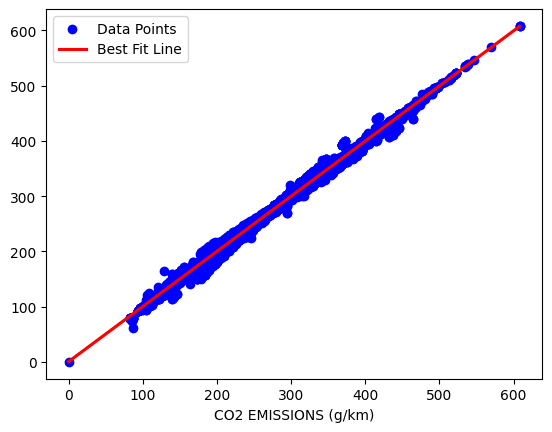

[-1.05532647e-02  1.29716181e+00 -2.61976018e-01 ... -3.57756254e+01
  3.11794046e+01  3.09929129e+01]
68.79093372029439


In [12]:
#linear regression model, all data
#x data is all data except for CO2
X_data = df.drop('CO2 EMISSIONS (g/km)', axis=1)
#y data is CO2
y_data = df['CO2 EMISSIONS (g/km)']
model = LinearRegression()
model.fit(X_data,y_data)
print(model)
#model predicting
model_predict = model.predict(X_data)
#calculate mse
mse = mean_squared_error(y_data, model_predict)
r2 = r2_score(y_data, model_predict)
print("R2", r2)
print("MSE",mse)
#plot data
plt.scatter(y_data, model_predict, color='blue', label='Data Points')
sns.regplot(x=y_data, y=model_predict, ci=None, color='red', scatter=False, label='Best Fit Line')
plt.legend()
plt.show()
#create best fit line
print(model.coef_)
print(model.intercept_)

In [13]:
#linear regression model, 80, 20 train/test split

R2 0.9961534764602358
MSE 14.717401878554405


<Axes: xlabel='CO2 EMISSIONS (g/km)'>

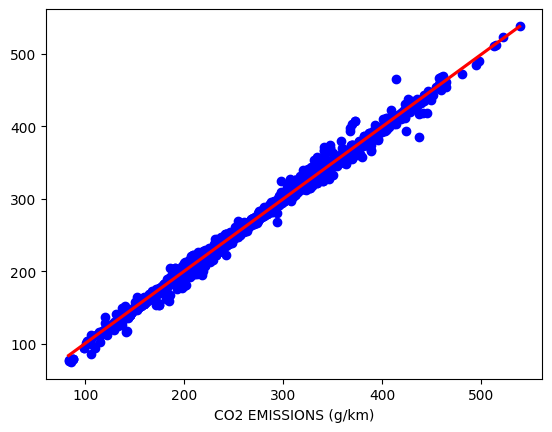

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
model_predict = model.predict(X_test)
mse = mean_squared_error(y_test, model_predict)
r2 = r2_score(y_test, model_predict)
print("R2", r2)
print("MSE",mse)
plt.scatter(y_test, model_predict, color='blue', label='Data Points')
sns.regplot(x=y_test, y=model_predict, ci=None, color='red', scatter=False, label='Best Fit Line')